# **Assignment** : Body Fat dataset

Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

Educational use of the dataset
This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat and it is desirable to have easy methods of estimating body fat

# **Setup Environment**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

In [28]:
#โหลด data เก็บไว้ใน dataframe
#from google.colab import files
#uploaded = files.upload()

In [29]:
# อ่านข้อมูลจาก dataframe
# Assuming the file is in a different directory
file_path = 'D:\Ai/bodyfat.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\User\AppData\Local\Temp\ipykernel_6820\688384662.py:3: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'D:\Ai/bodyfat.csv'


# **Understand the Data**

In [30]:
# ดูข้อมูล 10 ตัวแรก
df.head(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  
5  42.0   25.6    35.7     30.6   18.8  
6  38.3   22.9    31.9     27.8   17.7  
7  39.4   23.2    30.5     29.0   18.8  
8  38.3   23.8    35.9     31.1   18.2  
9  41.7   25.0    35.6     30.0   19.2

In [31]:
# ดูข้อมูล 10 ตัวสุดท้าย
df.tail(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
242   1.0304     30.4   66  234.25   72.00  41.4  119.7    109.0  109.1   
243   1.0256     32.6   67  227.75   72.75  41.3  115.8    113.4  109.8   
244   1.0334     29.0   67  199.50   68.50  40.7  118.3    106.1  101.6   
245   1.0641     15.2   68  155.50   69.25  36.3   97.4     84.3   94.4   
246   1.0308     30.2   69  215.50   70.50  40.8  113.7    107.6  110.0   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
242   63.7  42.4   24.6    35.6     30.7   19.5  
243   65.6  46.0   25.4    35.3     29.8   19.5  
244   58.2  38.8   24.1    32.1     29.3   18.5  
245   54.3  37.5   22.6    29.2     27.3   18.5  
246   63.3  44.0   22.6    37.5     32.6   18.8  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9

In [32]:
#นับจำนวน row กับ column
df.shape

(252, 15)

In [33]:
#แสดงข้อมูลเกี่ยวกับ dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


# **Missing Values**

In [34]:
#ตรวจสอบจำนวนค่าที่หายไปในแต่ละคอลัมน์ของ dataframe
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [35]:
df.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

## **Data Visualization**

In [36]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

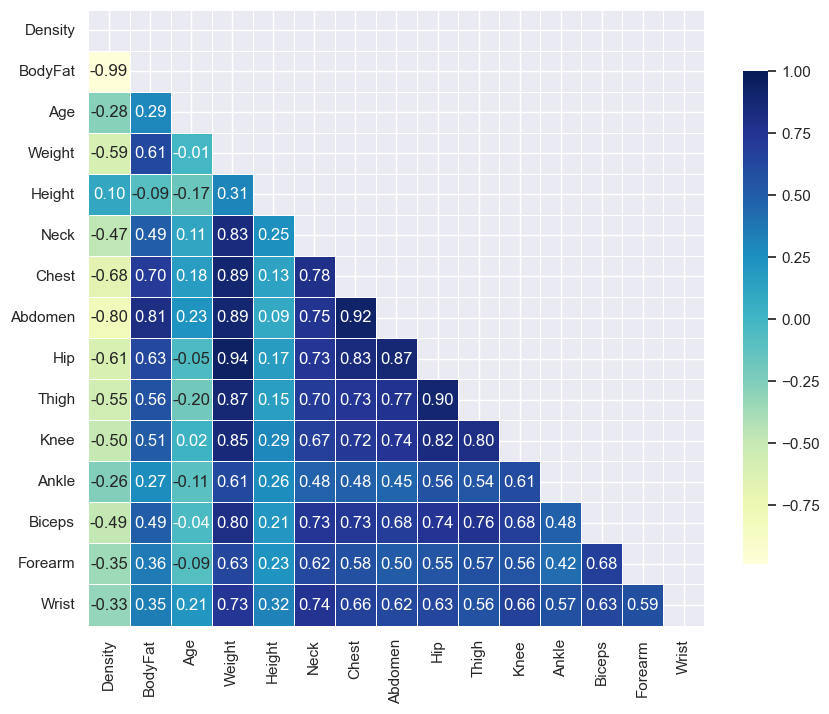

In [37]:
corr = df.corr(method = 'pearson')

sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask = np.triu(np.ones_like(corr)),cmap='YlGnBu', vmax=1, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink':.8},annot=True, fmt='.2f')
plt.show()

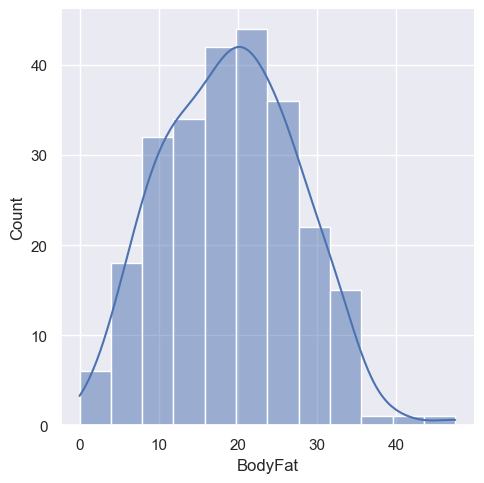

In [38]:
# กราฟแสดงจำนวนผู้ที่มีไขมันในร่างกายแต่ละระดับ โดยคนส่วนใหญ่มีไขมันในร่างกายอยู่ระหว่าง 10 ถึง 20 เปอร์เซ็นต์
y=df['BodyFat']
sns.displot(y, kde=True)

## **Split the Data**

In [39]:
#Split df into X_input and Y_output
# 1 Weight
# 2 Age
# 3 Weight
# 4 Height
X_input = df[['Age', 'Weight', 'Height', 'Neck', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']]
Y_output = df['BodyFat']

In [40]:
X_input

Age  Weight  Height  Neck  Knee  Ankle  Biceps  Forearm  Wrist
0     23  154.25   67.75  36.2  37.3   21.9    32.0     27.4   17.1
1     22  173.25   72.25  38.5  37.3   23.4    30.5     28.9   18.2
2     22  154.00   66.25  34.0  38.9   24.0    28.8     25.2   16.6
3     26  184.75   72.25  37.4  37.3   22.8    32.4     29.4   18.2
4     24  184.25   71.25  34.4  42.2   24.0    32.2     27.7   17.7
..   ...     ...     ...   ...   ...    ...     ...      ...    ...
247   70  134.25   67.00  34.9  34.8   21.5    25.6     25.7   18.5
248   72  201.00   69.75  40.9  40.8   23.2    35.2     28.6   20.1
249   72  186.75   66.00  38.9  37.3   21.5    31.3     27.2   18.0
250   72  190.75   70.50  38.9  41.6   22.7    30.5     29.4   19.8
251   74  207.50   70.00  40.8  42.2   24.6    33.7     30.0   20.9

[252 rows x 9 columns]

In [41]:
Y_output

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.2, random_state=42)
#model.save('my_model.h5')

## **Training**

In [43]:
#ลบตัวแปร Neck, Knee, Ankle, Biceps, Forearm, และ Wrist ออกไป
X_train = X_train.drop(columns=['Knee', 'Ankle', 'Biceps', 'Forearm'])
X_test = X_test.drop(columns=['Knee', 'Ankle', 'Biceps', 'Forearm'])

In [44]:
from sklearn.linear_model import LinearRegression
# สร้างโมเดล Linear Regression
model = LinearRegression()
# ฝึกโมเดลด้วยข้อมูล training set
model.fit(X_train, y_train)

LinearRegression()

In [45]:
X_train

Age  Weight  Height  Neck  Wrist
136   39  166.75   70.75  37.0   17.1
55    54  198.00   72.00  39.9   18.9
204   44  223.00   69.75  40.9   17.4
216   51  149.25   69.75  34.8   17.8
147   25  206.50   69.75  40.9   18.4
..   ...     ...     ...   ...    ...
106   43  200.25   73.50  38.6   18.1
14    35  187.75   69.50  40.5   18.2
92    47  165.25   70.50  37.5   18.4
179   39  234.75   74.50  42.8   19.9
102   41  172.75   71.25  36.3   18.4

[201 rows x 5 columns]

In [46]:
y_train

136    21.8
55     22.6
204    34.8
216    13.6
147    29.6
       ... 
106    19.3
14     22.1
92      8.5
179    16.9
102    20.1
Name: BodyFat, Length: 201, dtype: float64

## **Evaluations**

In [47]:
# ประเมินประสิทธิภาพของโมเดลใหม่บนชุดข้อมูลทดสอบที่ลดจำนวนตัวแปรแล้ว
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

In [48]:
print(r2_score(y_test, y_pred))

0.21992582887435852


## **Save Model**

In [49]:
import joblib
joblib.dump(model, 'bodyfat.pkl')
print("Model saved successfully.")

Model saved successfully.


In [53]:
#โหลด model มาใช้งาน
loaded_model = joblib.load('bodyfat.pkl')
print(loaded_model)
print("Model loaded successfully.")

LinearRegression()
Model loaded successfully.


## **Deploy Model**

In [51]:
Age = 22 #@param {type:"slider"}
Weight = 173.25 #@param {type:"slider", min:1, max:500, step:0.1}
Height = 72.25 #@param {type:"slider"}
Neck = 38.5 #@param {type:"slider", min:1, max:500, step:0.1}
Wrist = 18.2 #@param {type:"slider", min:1, max:500, step:0.1}
data = np.array(
    [
     [Age, Weight, Height, Neck, Wrist]
    ]
)
data

array([[ 22.  , 173.25,  72.25,  38.5 ,  18.2 ]])

In [52]:
answer = model.predict(data)
answer

d:\Ai\Backend\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.51515015])